<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png'></center>

# 0. 라이브러리와 파일 불러오기

**1) 라이브러리 불러오기**

- 이제 다음의 라이브러리는 Python에서 일상적으로 사용되는 라이브러리임을 알았을 것입니다.
- 우선 라이브러리를 불러오고 시작합니다.

In [0]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format =  'retina'

**2) 파일 불러오기**

- 모든 실습은 cvs 파일을 불러와서 사용합니다.
- airquality: 공기 상태에 대한 데이터 셋
- seoul_population: 서울시 인구 증가에 대한 데이터 셋
- titanic_simple: 타이타닉호 관련 데이터 셋(단순 버전)

In [0]:
# airquality
file_path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality.csv'
airquality = pd.read_csv(file_path)

# seoul
file_path = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_population.csv'
seoul = pd.read_csv(file_path)

# titanic
file_path = 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic_simple.csv'
titanic = pd.read_csv(file_path)

**[참고] 한글 폰트 설정**

- 다음 차트에서 한글이 깨저 보이면 한글 폰트에 대한 설정이 필요합니다.

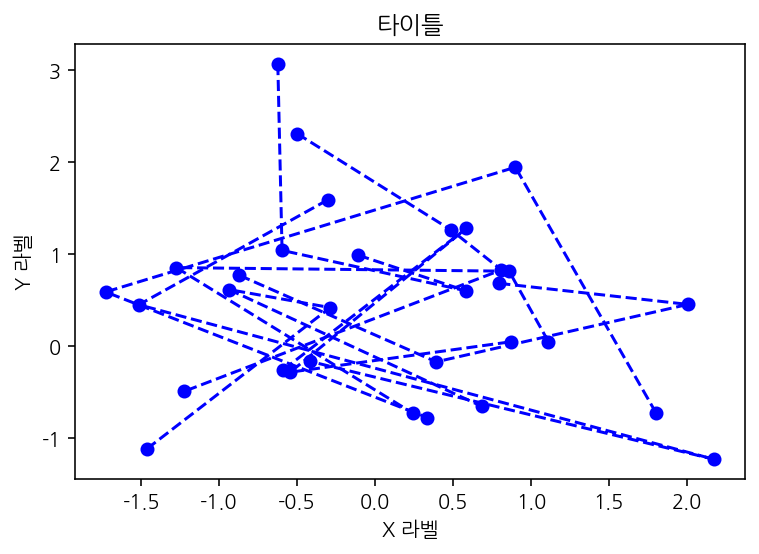

In [7]:
plt.plot(np.random.randn(4, 8), np.random.randn(4,8), 'bo--')
plt.title('타이틀')
plt.xlabel('X 라벨')
plt.ylabel('Y 라벨')
plt.show()

- Jupyter Notebook 한글 설정

In [0]:
# 맑은고딕
plt.rcParams['font.family'] = 'NanumGothic'

# 나눔고딕
#plt.rcParams['font.family'] = 'Malgun Gothic'

- 구글 코랩 한글 설정

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


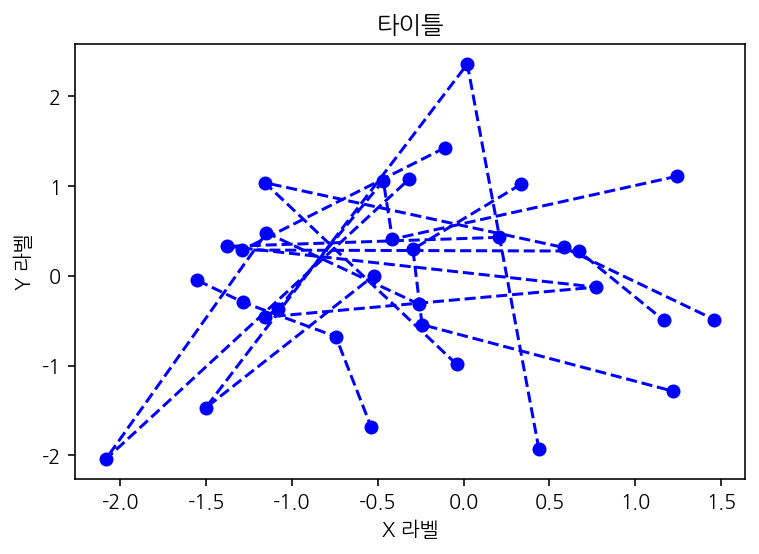

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 폰트 설지
!apt -qq -y install fonts-nanum

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()  

# 확인
plt.plot(np.random.randn(4, 8), np.random.randn(4,8), 'bo--')
plt.title('타이틀')
plt.xlabel('X 라벨')
plt.ylabel('Y 라벨')
plt.show()

# 1. Pandas와 Matplotlib을 사용한 시각화

- Pandas는 Matplotlib 기반의 자체 시각화 기능을 가지고 있습니다.
- 데이터프레임을 간단한 차트를 사용해 시각화해서 분석하고자 하는 경우 사용할 수 있습니다.
- 세련된 디자인과 깊이 있는 분석을 위해서는 다른 라이브러리를 사용하기를 권고합니다.

**[참고] 사용 가능한 차트 종류**

- **'line': line plot (default)**
- **'bar': vertical bar plot**
- **'barh': horizontal bar plot**
- **'hist': histogram**
- **'box': boxplot**
- 'kde': Kernel Density Estimation plot
- 'density' : same as ‘kde’
- 'area': area plot
- **'pie': pie plot**
- **'scatter': scatter plot**
- 'hexbin': hexbin plot

**[참고] 서울시 인구 정보 데이터 셋**

- year: 연도
- household: 가구수
- total: 전체
- male: 남자 전체
- female: 여자 전체
- k_total: 한국인 전체
- k_male: 한국인 남자
- k_female: 한국인 여자
- f_total: 외국인 전체
- f_male: 외국인 남자
- f_female: 외국인 여자
- older_65: 65세 이상

**[참고] 1973년 뉴욕 공기의 질 데이터 셋**

- Ozone: 오존 농도
- Solar.R: 태양 복사량
- Wind: 바람 세기
- Temp: 기온
- Month: 측정월
- Day: 측정일

In [8]:
# 서울시 인구 정보 확인
seoul.head()

,year,household,total,male,female,k_total,k_male,k_female,f_total,f_male,f_female,older_65
0,1995,345,1060,533,527,1055,530,525,5,2,2,46
1,1996,346,1047,526,521,1042,523,519,5,3,2,47
2,1997,350,1039,521,517,1034,519,515,5,3,3,49
3,1998,346,1032,517,515,1027,515,512,5,3,2,51
4,1999,349,1032,517,515,1026,514,512,6,3,3,53


## 1.1. Line Graph

- 일반적으로 날짜(시간) 축(x 축)의 변화에 따른 연속적인 변수 값의 변화를 살펴볼 때 사용합니다.


In [9]:
# year 열 정보 확인
seoul['year'].describe()

count      24.000000
mean     2006.500000
std         7.071068
min      1995.000000
25%      2000.750000
50%      2006.500000
75%      2012.250000
max      2018.000000
Name: year, dtype: float64

In [10]:
# 2010 ~ 2018 서울 인구 정보만 사용
seoul_pop = seoul[seoul['year'].between(2000, 2018)].copy()
seoul_pop.reset_index(drop=True, inplace=True)
seoul_pop['year'] = seoul_pop['year'].astype(str)
seoul_pop.head()

,year,household,total,male,female,k_total,k_male,k_female,f_total,f_male,f_female,older_65
0,2000,354,1037,520,518,1031,517,514,6,3,3,56
1,2001,357,1033,518,516,1026,514,512,7,3,3,59
2,2002,362,1028,514,514,1021,511,510,7,4,4,61
3,2003,371,1028,513,514,1017,508,509,10,5,5,65
4,2004,378,1029,513,516,1017,507,510,11,5,6,69


- 다음과 같이 Plot 종류와 x 축, y 축만 지정하면 Plot이 표시됩니다.

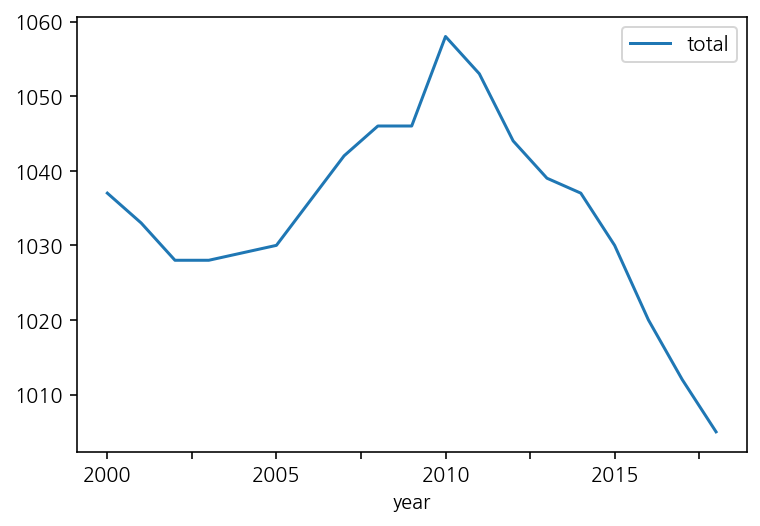

In [11]:
# 서울시 전체 인구 변화
seoul_pop.plot(kind='line', x='year', y='total')
plt.show()

- Line Plot이 기본값이므로 다음과 같이 kind 옵션을 지정하지 않아도 됩니다.

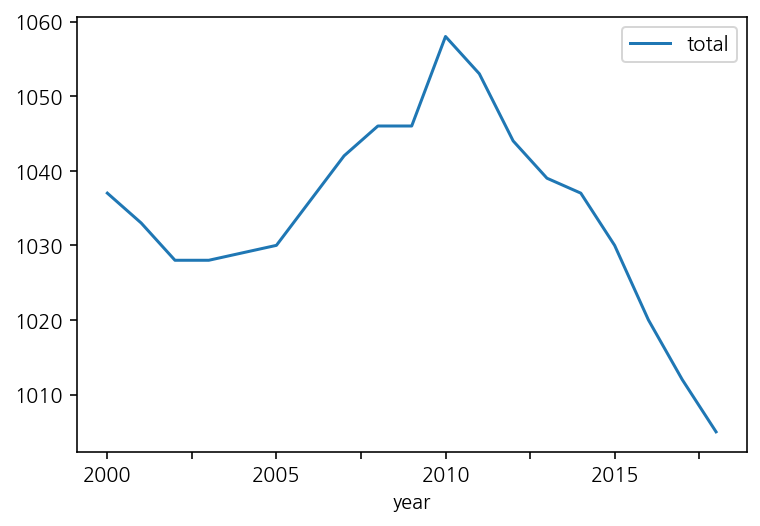

In [12]:
# 서울시 전체 인구 변화, kind 옵션 생략
seoul_pop.plot(x='year', y='total')
plt.show()

- y 축 값을 리스트 형태로 여러 개 지정할 수 있습니다.
- 두 선이 같이 표시되므로 범례를 통해 어느 선이 어떤 값인지 구분해야 합니다.

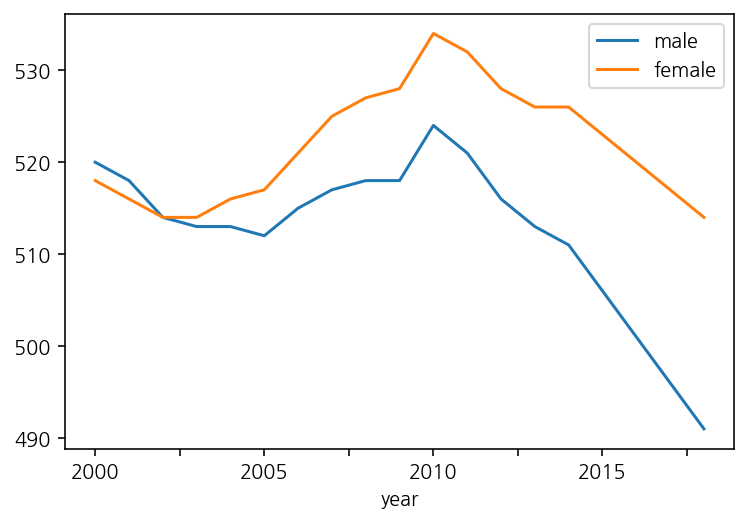

In [13]:
# 서울시 남녀 인구 변화
seoul_pop.plot(kind='line', x='year', y=['male', 'female'])
plt.show()

- 만일 x 축을 별도로 지정하지 않으면 인덱스가 x 축으로 사용됩니다.

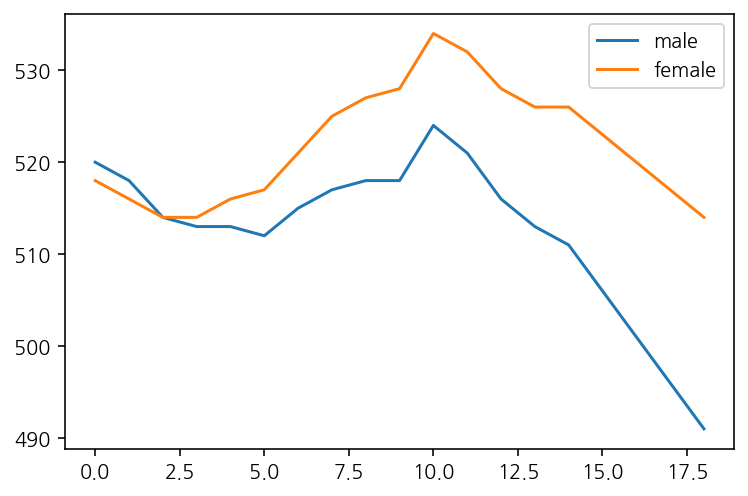

In [14]:
# 서울시 남녀 인구 변화
seoul_pop.plot(kind='line', y=['male', 'female'])
plt.show()

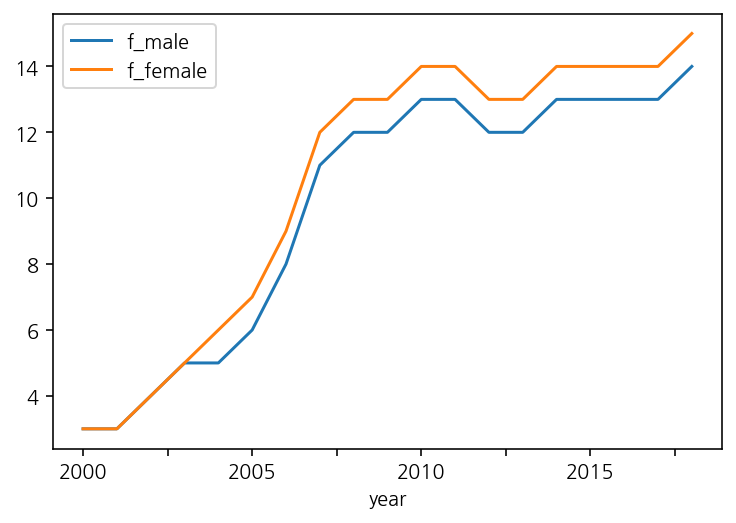

In [16]:
# 서울시 외국인 남녀 인구 변화
seoul_pop.plot(kind='line', y=['f_male', 'f_female'], x='year')
plt.show()

- 제목, 라인 색상과 모양, 그리드 선 등 다양한 변화를 줄 수 있습니다.
- 하지만 너무 많은 변화를 주면 오히려 이해하기 힘들 수 있으니 조심해야 합니다.

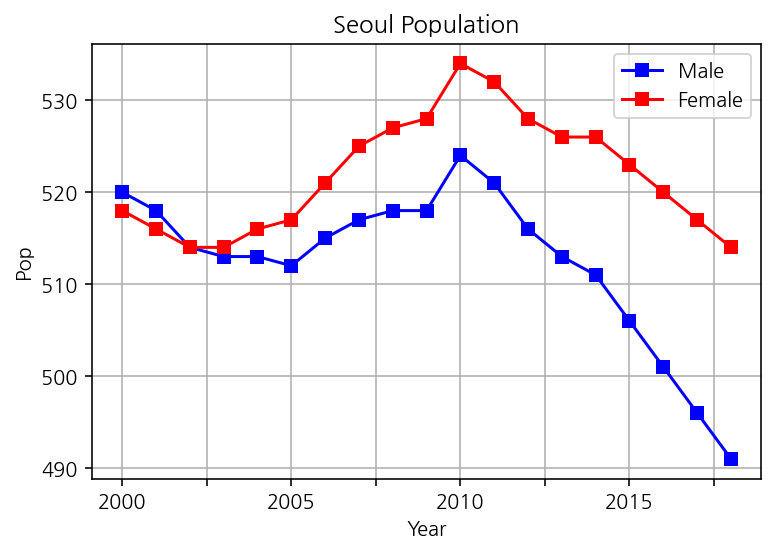

In [28]:
# 서울시 남녀 인구 변화
seoul_pop.plot(kind='line', x='year', y=['male', 'female'],
               title='Seoul Population',
               marker='s',
               color=['b','r'])
plt.ylabel('Pop')
plt.xlabel('Year')
plt.grid(True, axis='both')
plt.legend(labels=['Male','Female'])
plt.show()

## [실습] Line Graph

1) airquality 데이터프레임 상위 5개 행을 확인하세요.

In [50]:
airquality.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


2) x축 지정 없이 Temp을 Line Graph로 표시해 보세요.

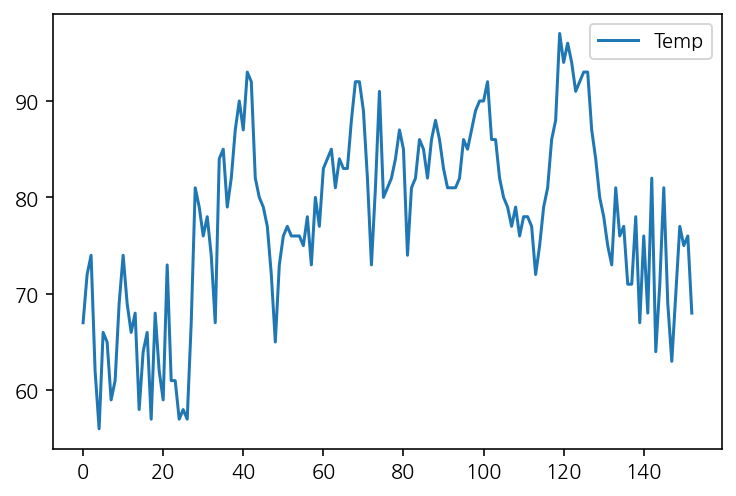

In [43]:
airquality.plot(y='Temp')
plt.show()

3) 5월 달 Temp를 Line Graph로 표시하세요. 단 x축은 Day를 지정하세요.

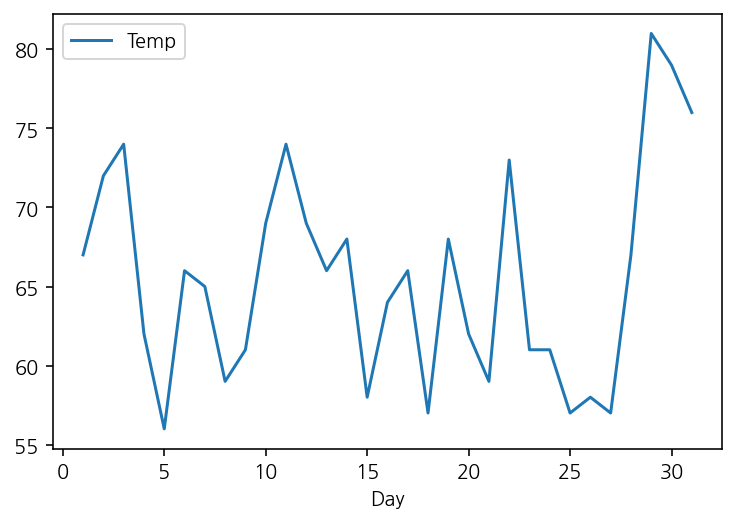

In [44]:
airquality[airquality['Month'].between(5,5)].plot(x='Day', y='Temp')
plt.show()

4) 위 3)번 코드를 가져와 수정해서 결과에 Ozone를 같이 표시해 보세요.

In [59]:
a = airquality['Ozone'].value_counts(dropna=False)
a

NaN     37
23.0     6
21.0     4
13.0     4
20.0     4
        ..
48.0     1
27.0     1
10.0     1
77.0     1
41.0     1
Name: Ozone, Length: 68, dtype: int64

In [58]:
airquality['Ozone'].value_counts(dropna=False)[np.nan]

37

In [62]:
type(a.index[1])

numpy.float64

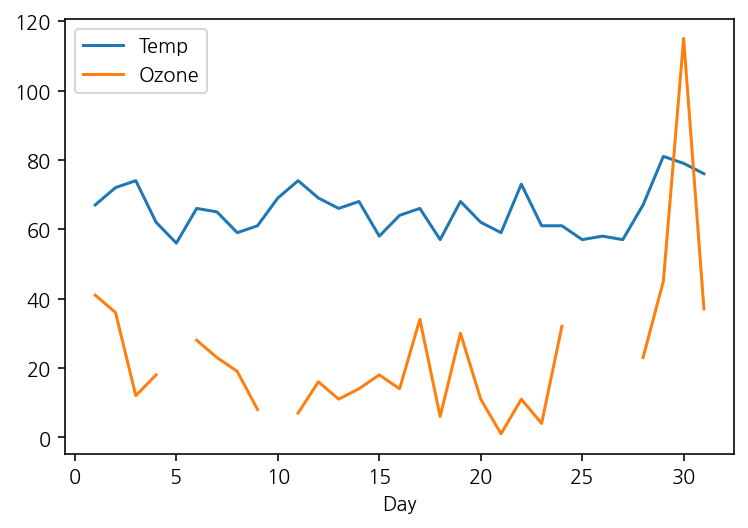

In [45]:
airquality[airquality['Month'].between(5,5)].plot(x='Day', y=['Temp', 'Ozone'])
plt.show()

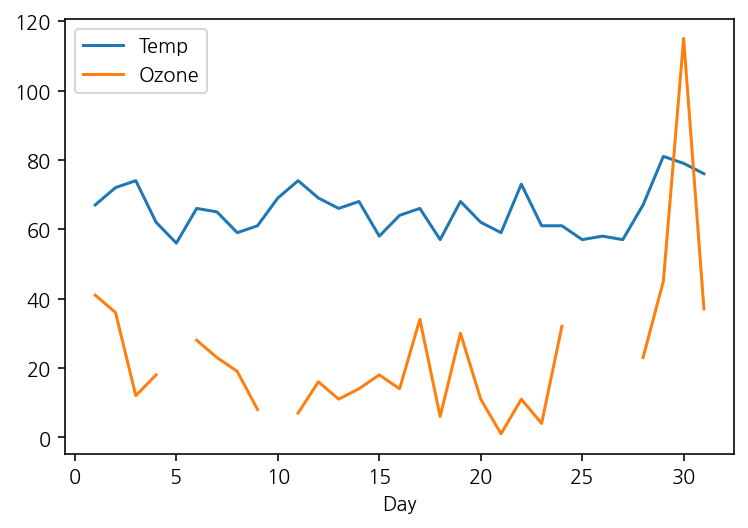

In [46]:
airquality[airquality['Month'] == 5].plot(x='Day', y=['Temp', 'Ozone'])
plt.show()

5) Ozone 열이 NaN 값을 직전 값으로 채워 보세요.

In [47]:
# Ozone 열 NaN 값 채우기
airquality['Ozone'].fillna(method='ffill', inplace=True)
airquality.head(10)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,18.0,NaN,14.3,56,5,5
5,28.0,NaN,14.9,66,5,6
6,23.0,299.0,8.6,65,5,7
7,19.0,99.0,13.8,59,5,8
8,8.0,19.0,20.1,61,5,9
9,8.0,194.0,8.6,69,5,10


6) 4)번 코드를 가져와 다시 실행해 보세요.

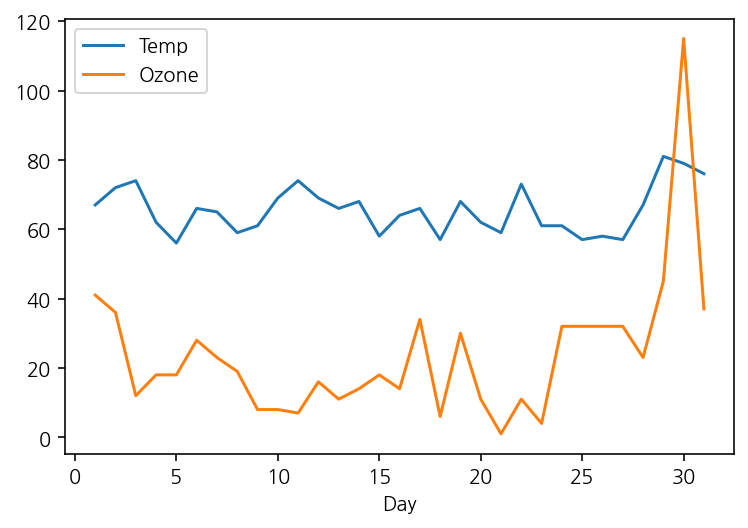

In [48]:
airquality[airquality['Month'].between(5,5)].plot(x='Day', y=['Temp', 'Ozone'])
plt.show()

## 1.2. Bar Chart

- 일반적으로 x 축의 변화에 따른 연속형 변수 값의 크기를 비교할 때 사용합니다.

**1) 기본 Bar Chart**

- 사용하는 방법은 Line Plot과 동일합니다. **kind** 옵션만 **bar**로 지정하면 됩니다.

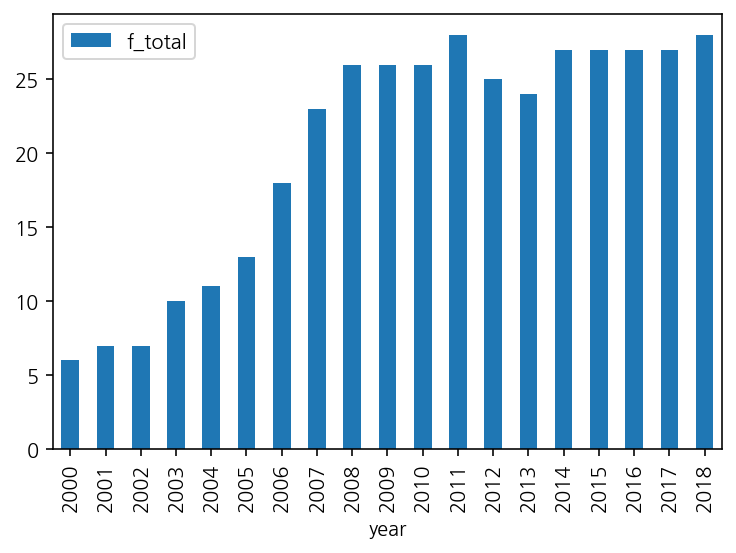

In [63]:
# 서울시 외국인 인구 변화
seoul_pop.plot(kind='bar', x='year', y='f_total')
plt.show()

- y 축에 리스트 형태로 여러 열을 전달하면 두 열의 값이 이웃되어 표시됩니다.
- 값의 전체 추이와 더불어 두 열 값의 크고 작음을 비교할 수 있어 좋습니다.

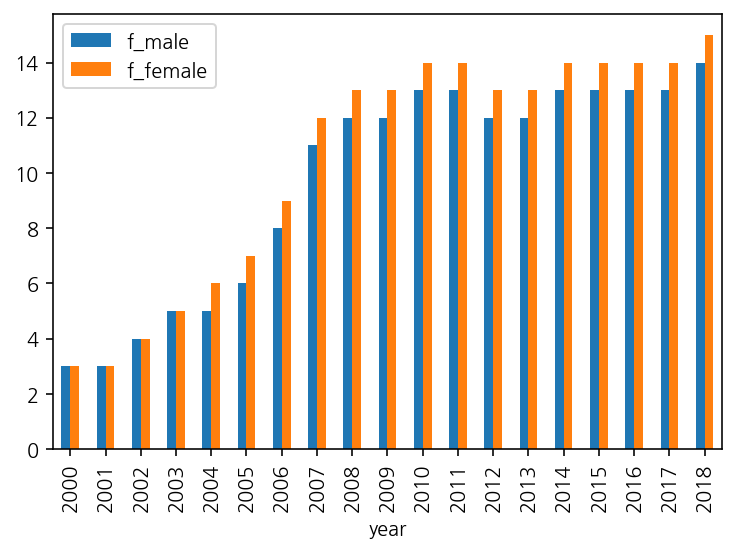

In [64]:
# 서울시 남녀 외국인 인구 변화
seoul_pop.plot(kind='bar', x='year', y=['f_male' ,'f_female'])
plt.show()

**2) 누적 Bar Chart**

- **stacked** 옵션만 **True** 로 지정하면 됩니다. 이래도 되나 싶을 정도로 정말 쉽습니다.

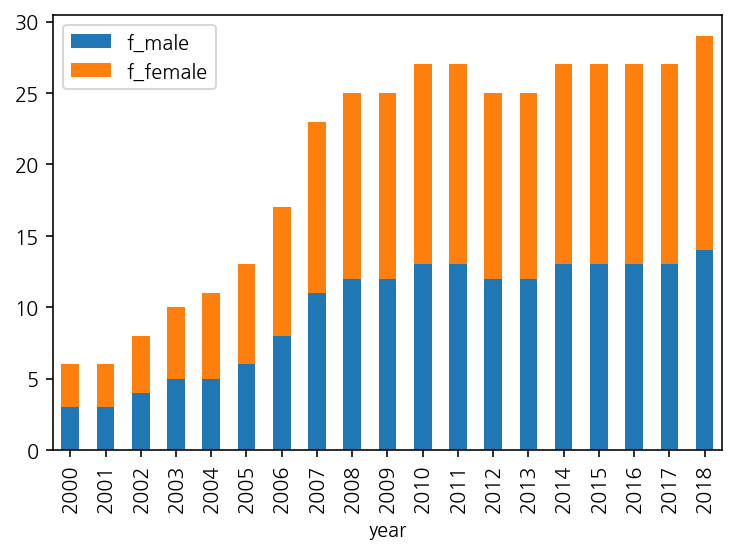

In [65]:
# 서울시 남녀 외국인 인구 변화
seoul_pop.plot(kind='bar', x='year', y=['f_male' ,'f_female'], stacked=True)
plt.show()

- 누적 Bar Chart를 욕심 부리지 말고 아주 조금만 꾸며봅시다.

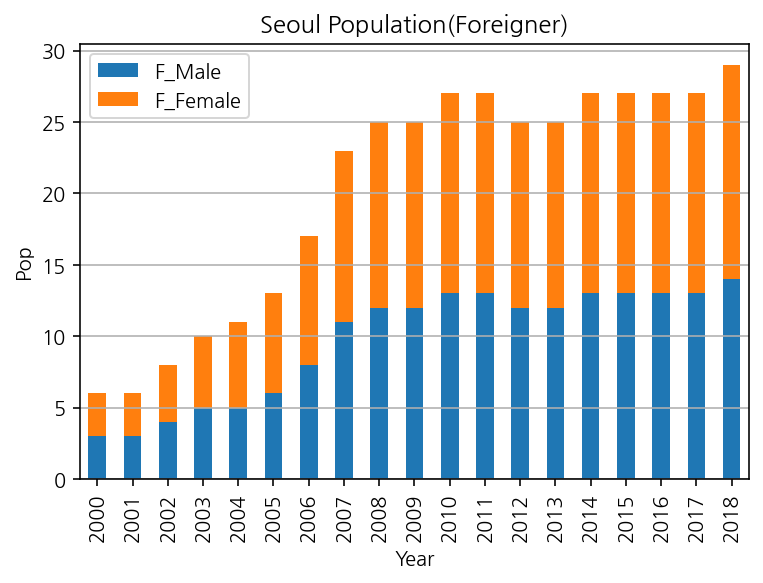

In [66]:
# 서울시 남녀 외국인 인구 변화
seoul_pop.plot(kind='bar', x='year', y=['f_male', 'f_female'], 
               stacked=True,
               title='Seoul Population(Foreigner)')
plt.ylabel('Pop')
plt.xlabel('Year')
plt.grid(True, axis='y')
plt.legend(labels=['F_Male','F_Female'])
plt.show()

- kind 옵션을 **barh**로 지정하면 가로 방향의 Bar Chart가 표시됩니다. 
- x 축과 y 축은 바꿀 필요 없이 그대로 두면 됩니다.

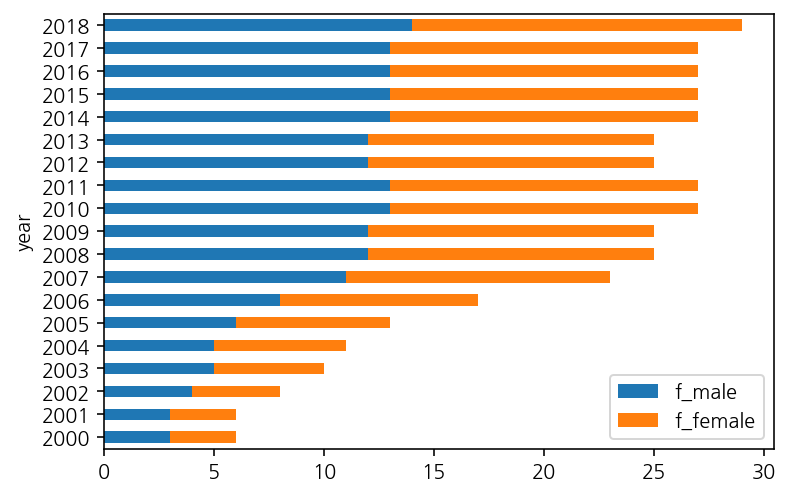

In [67]:
# 서울시 남녀 외국인 인구 변화
seoul_pop.plot(kind='barh', x='year', y=['f_male', 'f_female'], stacked=True)
plt.show()

## 1.3. Scatter Plot

- **산포도** 또는 **산점도**라고 불리며, 두 연속형 변수의 값의 분포(상관관계)를 살펴볼 때 사용합니다.
- 머신러닝을 배우게 되면 Scatter Plot을 정말 많이 그려보게 됩니다.
- 머신러닝은 변수(=열)들의 상관 관계를 통해 미래의 값을 예측하기 때문입니다.

In [68]:
# airquality 데이터 확인
airquality.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


- 기온과 오존 농도는 상관관계가 과연 있을까요?
- 다음과 같이 Scatter Plot으로 확인할 수 있습니다.
- **kind** 옵션을 **scatter**로만 지정하면 됩니다. 정말 편하죠?

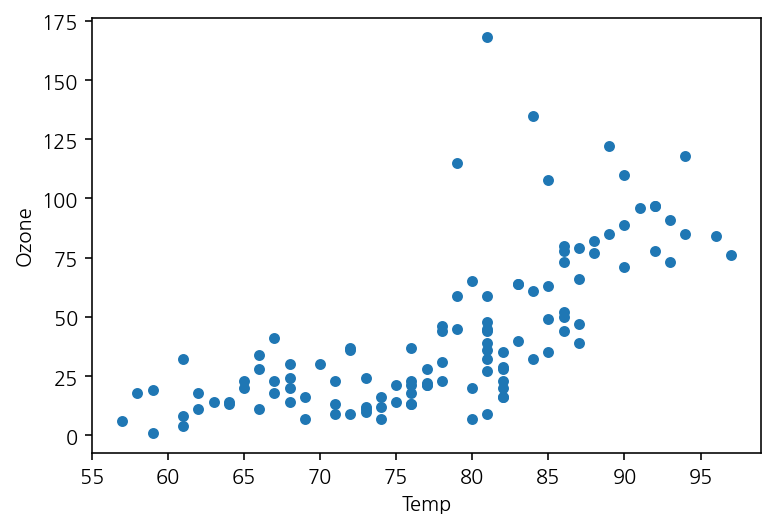

In [69]:
# 기온과 오존 농도 관계
airquality.plot(kind='scatter', x='Temp', y='Ozone')
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' align = "left" width=120/>

위 코드를 참고하여 풍속과 오존 농도가 상관관계가 있는지 Scatter Plot으로 확인해 보세요.

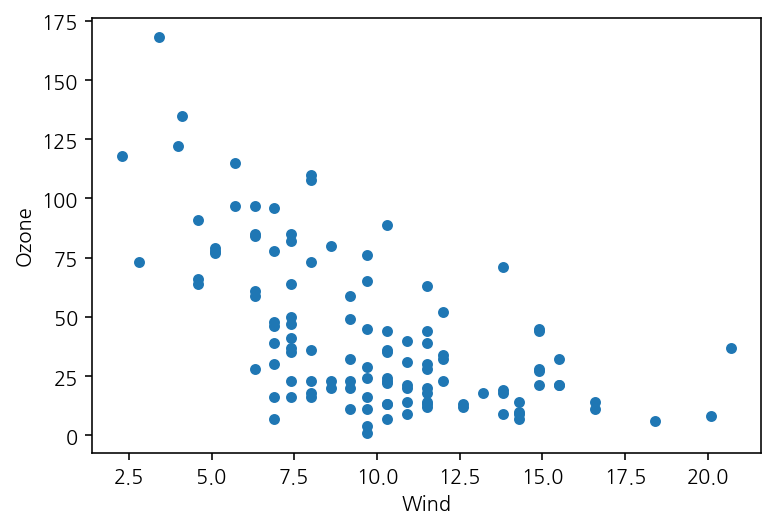

In [70]:
# 풍속과 오존 농도 관계
airquality.plot(kind='scatter', x='Wind', y='Ozone')
plt.show()

- 태양 복사량과 오존 농도 상관관계를 확인하면서 Scatter Plot을 아주 조금만 꾸며봅시다.

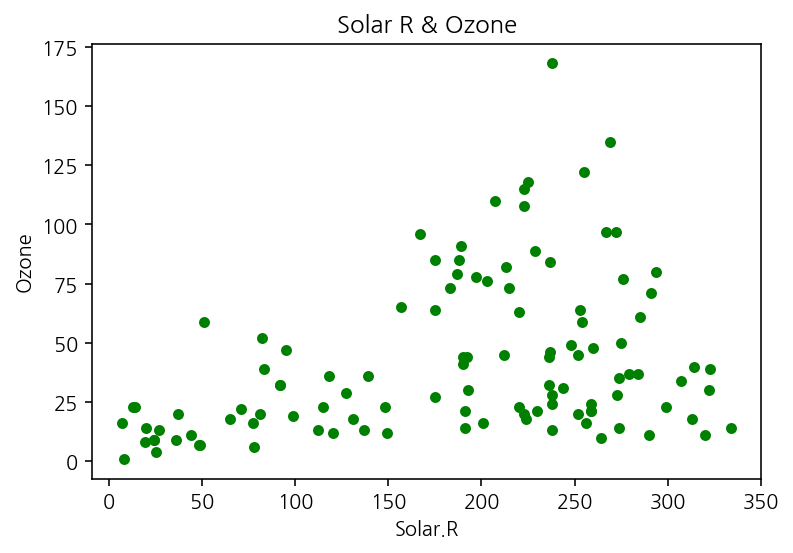

In [72]:
# 태양 복사량과 오존 농도 관계
airquality.plot(kind='scatter', x='Solar.R', y='Ozone', 
                color='g', 
                title='Solar R & Ozone')
plt.show()

## 1.4. Histogram

- 연속된 데이터를 갖는 열의 값이 어떻게 분포되어 있는지를 살펴볼 때 사용합니다.
- 데이터가 고르게 분포하는지 아니면, 일정 영역에 치우쳐 있는지 쉽게 알 수 있습니다.
- 열 간의 관계를 비교하는 게 아니므로 y 축에 하나의 열을 지정하면 됩니다.
- y 축에 리스트 형태로 여러 열을 지정할 수 있지만 큰 의미가 없습니다.

- 과연 그 당시 뉴욕의 온도는 어땠을까요?

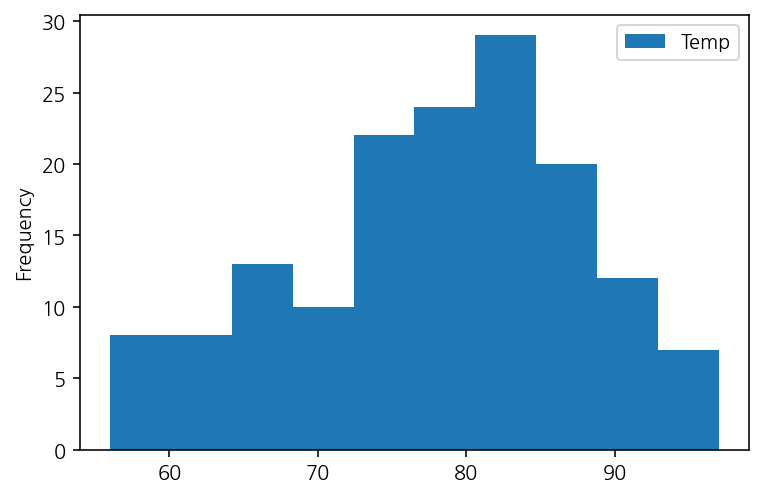

In [73]:
# 기온 빈도
airquality.plot(kind='hist', y=['Temp'])
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' align = "left" width=120/>

기온이 화씨로 되어 있어 섭씨에 익숙한 저희는 약간 당황스럽습니다. 어떻게 하면 섭씨로 표시할 수 있을까요?

- 참고: (화씨 - 32) / 1.8 = 섭씨

In [74]:
# 기온 빈도, 섭씨
airquality['Temp_c'] = (airquality['Temp'] - 32) / 1.8
airquality.head()

,Ozone,Solar.R,Wind,Temp,Month,Day,Temp_c
0,41.0,190.0,7.4,67,5,1,19.444444
1,36.0,118.0,8.0,72,5,2,22.222222
2,12.0,149.0,12.6,74,5,3,23.333333
3,18.0,313.0,11.5,62,5,4,16.666667
4,NaN,NaN,14.3,56,5,5,13.333333


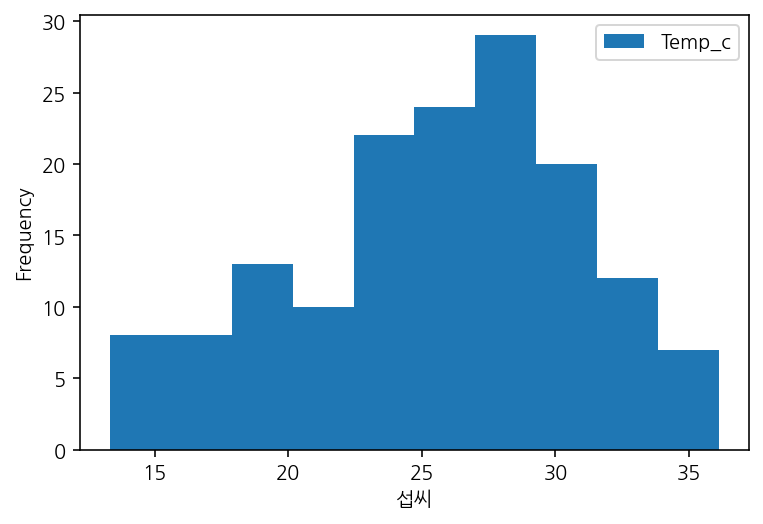

In [78]:
# Histogram 표시
airquality.plot(kind='hist', y=['Temp_c'])
plt.xlabel('섭씨')
plt.show()

- Histogram을 아주 조금만 꾸며봅시다.

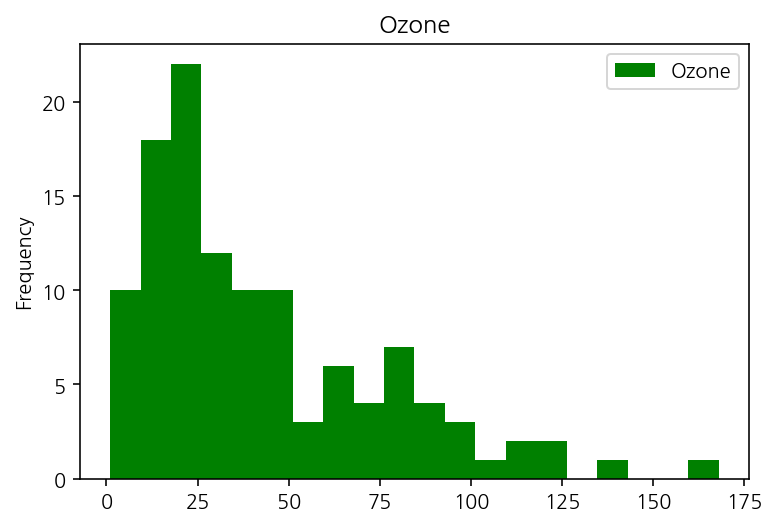

In [79]:
# 풍속 빈도
airquality.plot(kind='hist', y='Ozone', bins=20, color='g', title='Ozone')
plt.show()

## 1.5. Boxplot

- Histogram보다 좀더 깊이 있게 연속형 변수의 분포를 살펴볼 때 사용합니다.
- 평상시 많이 접하는 Plot이 아니므로 Plot이 의미하는 바를 조금 학습해야 합니다.
- 바로 위 오존 농도에 대한 Histogram과 다음의 Box Plot을 비교해 보세요.

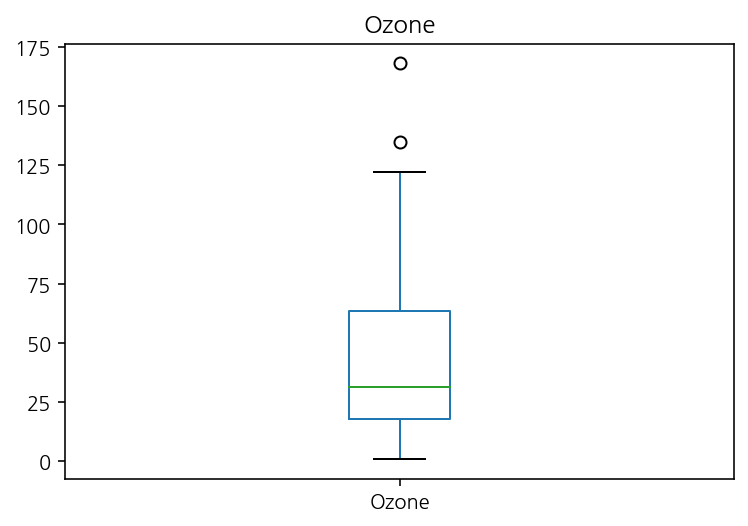

In [80]:
# 오존 농도 분석
airquality.plot(kind='box', y='Ozone', title='Ozone')
plt.show()

**[참고] Box Plot 이해하기 #1**

<img src='https://raw.githubusercontent.com/jangrae/img/master/boxplot.png' align = "left" width=360/>

**[참고] Box Plot 이해하기 #2**

<img src='https://raw.githubusercontent.com/jangrae/img/master/boxplot2.png' align = "left" width=800/>

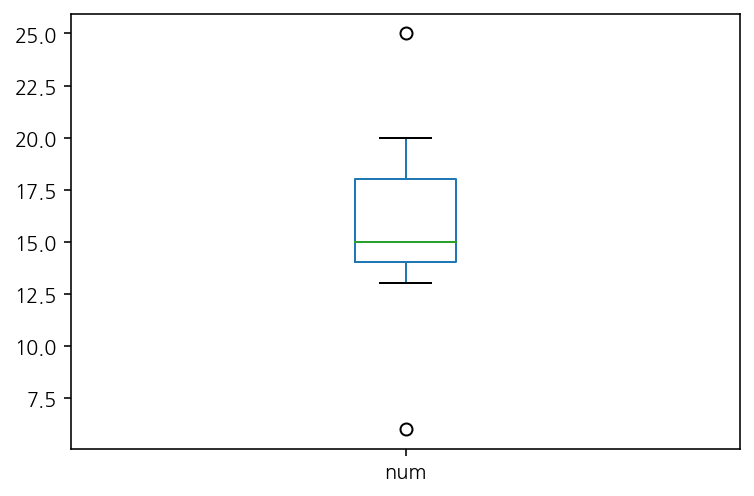

In [81]:
a = pd.DataFrame([6, 13, 13, 14, 14, 14, 15, 16, 17, 18, 19, 20, 25], columns=['num'])
a.plot(kind='box', y='num')
plt.show()

## <center>수고하셨습니다.</center>
<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/end.png' width=200/></center>